In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('/Users/charles/Desktop/application_train.csv')

In [3]:
data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [4]:
# Ignore NA, 計算五值
five_num = [0, 25, 50, 75, 100]
quantile_5s = [np.percentile(data[~data['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = i) for i in five_num]
print(quantile_5s)

[1615.5, 16524.0, 24903.0, 34596.0, 258025.5]


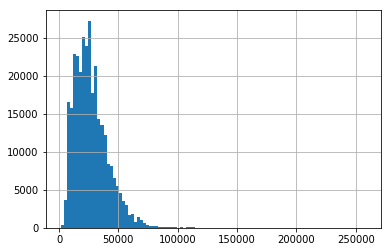

In [7]:
data[~data['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'].hist(bins = 100)
plt.show()

# Homework

1. 列出 AMT_ANNUITY 的 q0 - q100

In [9]:
ranges=list(range(0,101))

In [11]:
#five_num = [0, 25, 50, 75, 100]
quantile_5s = [np.percentile(data[~data['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = i) for i in ranges]
print(quantile_5s)

[1615.5, 6182.910000000001, 6750.0, 7875.0, 8703.0, 9000.0, 9000.0, 9553.5, 10125.0, 10503.0, 11074.5, 11430.0, 11970.0, 12375.0, 12838.5, 13302.0, 13500.0, 13500.0, 13896.0, 14350.5, 14701.5, 15124.5, 15583.5, 15970.5, 16209.0, 16524.0, 16852.5, 17109.0, 17487.0, 17806.5, 18189.0, 18643.5, 19102.5, 19417.5, 19836.0, 20151.0, 20421.0, 20853.0, 21186.0, 21609.0, 21865.5, 22018.5, 22342.5, 22527.0, 22972.5, 23346.0, 23719.5, 23931.0, 24259.5, 24583.589999999953, 24903.0, 25240.5, 25537.5, 25960.5, 26217.0, 26316.0, 26640.0, 26860.5, 27189.0, 27558.0, 28062.0, 28480.5, 28917.0, 29340.0, 29830.5, 30078.0, 30483.0, 30897.0, 31275.0, 31630.5, 32004.0, 32458.5, 32895.0, 33376.5, 33984.0, 34596.0, 35345.16000000005, 35806.5, 36328.5, 36747.0, 37516.5, 37948.5, 38556.0, 39456.0, 40135.5, 40806.0, 41845.5, 42790.5, 43735.5, 44991.0, 45954.0, 47254.5, 48465.0, 49878.0, 51745.5, 53325.0, 55624.5, 58482.0, 62964.0, 70006.5, 258025.5]


2.1 將 AMT_ANNUITY 中的 NAs 暫時以中位數填補

In [29]:
data['AMT_ANNUITY'].fillna(data['AMT_ANNUITY'].median(),inplace=True)

In [30]:
data['AMT_ANNUITY'][data['AMT_ANNUITY'].isnull()==True]

Series([], Name: AMT_ANNUITY, dtype: float64)

In [31]:
print(data.isnull().sum())

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

2.2 將 AMT_ANNUITY 的數值標準化至 -1 ~ 1 間

In [36]:
data['AMT_ANNUITY']

0         24700.5
1         35698.5
2          6750.0
3         29686.5
4         21865.5
5         27517.5
6         41301.0
7         42075.0
8         33826.5
9         20250.0
10        21177.0
11        10678.5
12         5881.5
13        28966.5
14        32778.0
15        20160.0
16        26149.5
17        13500.0
18         7875.0
19        17563.5
20        21375.0
21        37561.5
22        32521.5
23        23850.0
24        12703.5
25        11074.5
26        27076.5
27        23827.5
28        57676.5
29         9000.0
           ...   
307481    19975.5
307482    34969.5
307483    16479.0
307484    35617.5
307485     9000.0
307486    18283.5
307487    31473.0
307488    13351.5
307489    23089.5
307490     9148.5
307491    31522.5
307492    43443.0
307493    37678.5
307494    46858.5
307495    23773.5
307496    16875.0
307497    12028.5
307498    52168.5
307499    12694.5
307500    35982.0
307501    11871.0
307502    10620.0
307503    17770.5
307504    16096.5
307505    

In [47]:
from sklearn.preprocessing import MaxAbsScaler
arrays=np.array(data['AMT_ANNUITY'].values)
transformer = MaxAbsScaler().fit(np.reshape(arrays,(-1,1)))
transformer.transform(np.reshape(arrays,(-1,1)))

array([[0.09572891],
       [0.1383526 ],
       [0.02616021],
       ...,
       [0.11618619],
       [0.07830621],
       [0.19035909]])

3. 將 AMT_GOOD_PRICE 的 NAs 以眾數填補

In [48]:
data['AMT_GOODS_PRICE'].fillna(data['AMT_GOODS_PRICE'].mode(),inplace=True)